# Import libraries

In [300]:
# pip install --upgrade pip setuptools
# pip install wordcloud
# !pip install lightgbm
# !pip install nltk
# !pip install imbalanced-learn
# !pip install --upgrade scikit-learn
# !pip install --upgrade imbalanced-learn
# !pip install -U Textblob
# !python -m textblob.download_corpora
# !pip install unidecode
# !pip install lightgbm==2.2.3
# !pip install contractions
# !pip install scikit-optimize
# !pip install scipy

In [1276]:
# import modules
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import nltk
import re
import joblib
import contractions

# modules preprocessing
from matplotlib.ticker import FormatStrFormatter 
from matplotlib.colors import LinearSegmentedColormap
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from wordcloud import WordCloud
from collections import Counter
from unidecode import unidecode
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
import contractions
from scipy.stats import randint, uniform

# sentiment & transforming features
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler

# algorithms
from sklearn.ensemble import RandomForestClassifier
# import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, mean_absolute_error,  mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sebastianhaecker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sebastianhaecker/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sebastianhaecker/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load dataset WebMD

In [713]:
# Load raw dataset  WebMD
# Link to dataset on Kaggle: https://www.kaggle.com/datasets/rohanharode07/webmd-drug-reviews-dataset
raw_data = pd.read_csv('webmd.csv')

In [714]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362763 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [715]:
# Check missing values and value counts target
raw_data.isna().sum()
# raw_data.EaseofUse.value_counts()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          43
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [716]:
# Convert date to datetime
raw_data['Date']= pd.to_datetime(raw_data['Date'])

In [717]:
# Subsetting a portion of data for experiments
raw_data = raw_data[raw_data['Date'] > '2012-01-01']

In [718]:
# Create subset csv dataset for experiments
# raw_data.to_csv('/content/drive/MyDrive/3_classes/dataset.csv')
raw_data.to_csv('dataset.csv')

## Load subset data

In [1083]:
# Load subset csv dataset for experiments
# data = pd.read_csv('/content/drive/MyDrive/3_classes/dataset.csv', index_col = 0)
data = pd.read_csv('dataset.csv', index_col = 0)

In [1084]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131586 entries, 0 to 362282
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            131586 non-null  object
 1   Condition      131586 non-null  object
 2   Date           131586 non-null  object
 3   Drug           131586 non-null  object
 4   DrugId         131586 non-null  int64 
 5   EaseofUse      131586 non-null  int64 
 6   Effectiveness  131586 non-null  int64 
 7   Reviews        131574 non-null  object
 8   Satisfaction   131586 non-null  int64 
 9   Sex            131586 non-null  object
 10  Sides          131586 non-null  object
 11  UsefulCount    131586 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 13.1+ MB


In [1085]:
# Replace empty spaces with nan
data.isna().sum() / data.shape[0]
data= data.applymap(lambda x: np.nan if x == ' ' else x)

/var/folders/l7/34l_1dvx25g3dr7nbqs1k0lm0000gn/T/ipykernel_28620/3369953690.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data= data.applymap(lambda x: np.nan if x == ' ' else x)


In [1086]:
data.isna().sum()

Age               3544
Condition           18
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          12412
Satisfaction         0
Sex              16635
Sides             7998
UsefulCount          0
dtype: int64

/var/folders/l7/34l_1dvx25g3dr7nbqs1k0lm0000gn/T/ipykernel_28620/1314309547.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, total_values_percentage[i] + 1, f'{total_values_percentage[i]:.2f}%', ha='center')
/var/folders/l7/34l_1dvx25g3dr7nbqs1k0lm0000gn/T/ipykernel_28620/1314309547.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, missing_values_percentage[i] + 1, f'{missing_values_percentage[i]:.2f}%', ha='center')


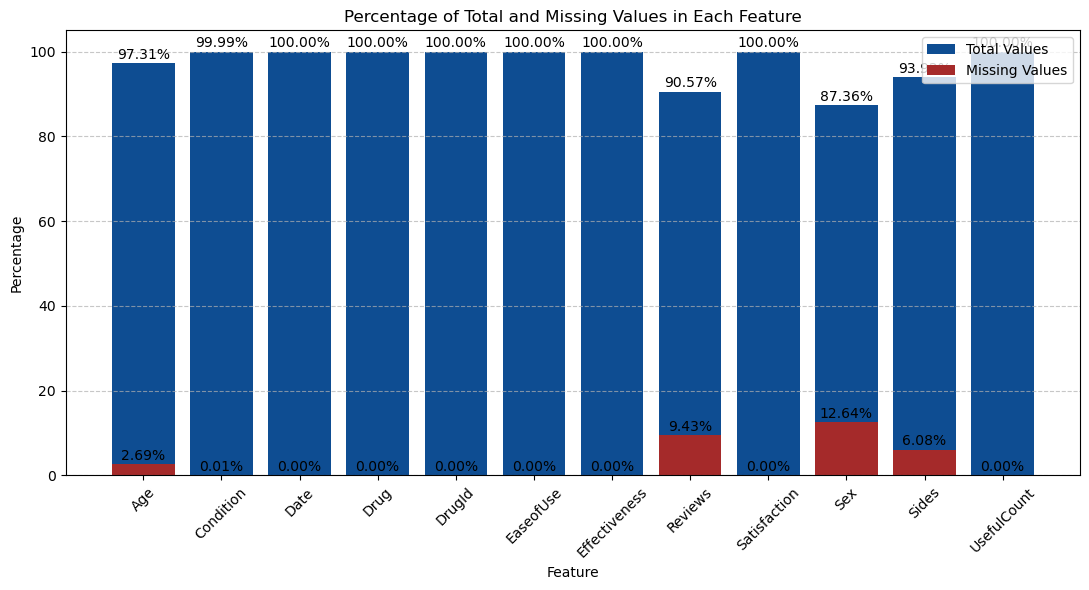

In [407]:
# Plot missing value 
total_rows = len(data)
total_values = data.count()
missing_values = data.isnull().sum()
total_values_percentage = (total_values / total_rows) * 100
missing_values_percentage = (missing_values / total_rows) * 100

fig, ax = plt.subplots(figsize=(11, 6))
plt.bar(range(len(data.columns)), total_values_percentage, color='#0E4D92', label='Total Values')
plt.bar(range(len(data.columns)), missing_values_percentage, color='Brown', label='Missing Values')

for i in range(len(data.columns)):
    plt.text(i, total_values_percentage[i] + 1, f'{total_values_percentage[i]:.2f}%', ha='center')
    plt.text(i, missing_values_percentage[i] + 1, f'{missing_values_percentage[i]:.2f}%', ha='center')

plt.xlabel('Feature')
plt.ylabel('Percentage')
plt.title('Percentage of Total and Missing Values in Each Feature')
plt.xticks(range(len(data.columns)), data.columns, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('missing_values_percentage.png', dpi=300, bbox_inches='tight')
plt.show()

In [1087]:
#Drop missing values (There are a lot of observation so dropping missing values wont affect the amount of observations)
data = data.dropna()

In [1088]:
# Drop columns
data.drop(columns=['Effectiveness', 'Satisfaction', 'Date', 'Sides', 'UsefulCount', 'Drug', 'DrugId', 'Condition'], inplace=True)

In [1089]:
# Check duplicates
duplicates = data.duplicated().sum()
duplicates

19857

In [1090]:
# Drop duplicate rows and keep the first occurrence
data.drop_duplicates(keep='first', inplace=True)

In [1091]:
check_dup= data.duplicated().sum()
check_dup

0

In [1092]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75808 entries, 0 to 362281
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        75808 non-null  object
 1   EaseofUse  75808 non-null  int64 
 2   Reviews    75808 non-null  object
 3   Sex        75808 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


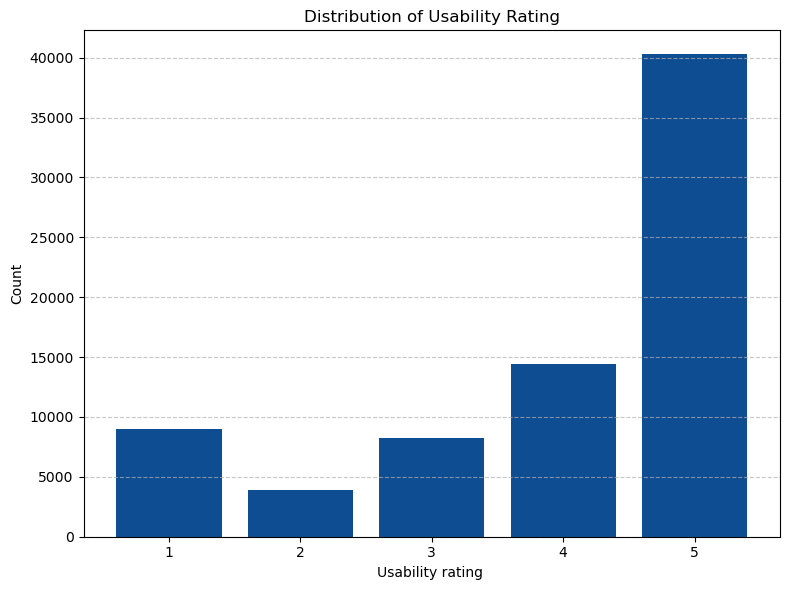

In [1093]:
# Distribution
fig, ax = plt.subplots(figsize=(8, 6))
data['EaseofUse'].value_counts().sort_index().plot(kind="bar", width=0.8, color = '#0E4D92')
plt.xlabel('Usability rating ')
plt.ylabel('Count')
plt.title('Distribution of Usability Rating')
plt.xticks(rotation=0)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('5scores.png', dpi=300, bbox_inches='tight')
plt.show()

In [1094]:
print(data.EaseofUse.value_counts())

EaseofUse
5    40272
4    14398
1     8968
3     8250
2     3920
Name: count, dtype: int64


In [1095]:
# Mapping the classes: 1 and 2 = challenging, 3 = moderate and 4 and 5 = user-friendly, after that they are transformed into integers for processing by models
def classes(score):
    if score in [1, 2]:
        return 'challenging'
    elif score == 3:
        return 'moderate'
    elif score in [4, 5]:
        return 'user-friendly'

data['EaseofUseClass'] = data['EaseofUse'].apply(classes)
data.drop(columns='EaseofUse', inplace=True)
class_encoding = {
    'challenging': 1,
    'moderate': 2,
    'user-friendly': 3
}
data['EaseofUse'] = data['EaseofUseClass'].map(class_encoding)
data.drop(columns='EaseofUseClass', inplace=True)

In [1096]:
data.EaseofUse.value_counts()

EaseofUse
3    54670
1    12888
2     8250
Name: count, dtype: int64

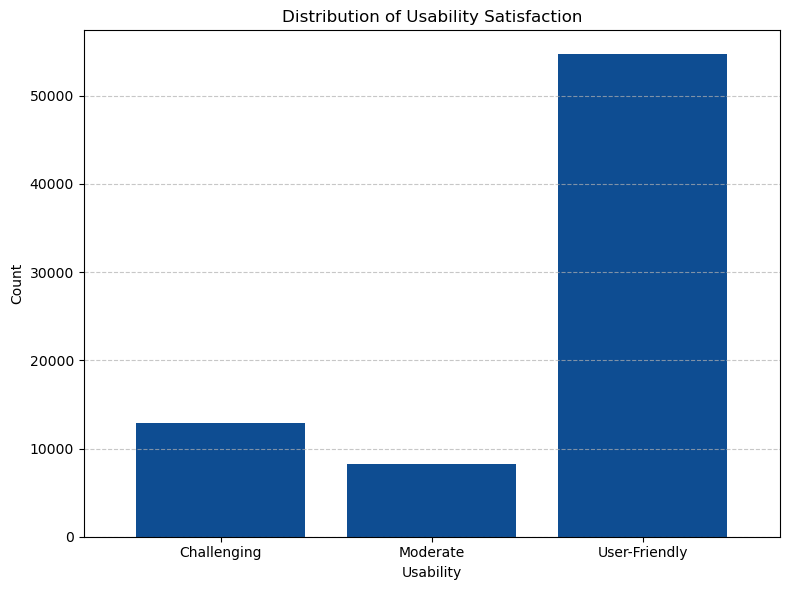

In [1097]:
fig, ax = plt.subplots(figsize=(8, 6))
data['EaseofUse'].replace({1: 'Challenging', 2: 'Moderate', 3: 'User-Friendly'}).value_counts().sort_index().plot(kind="bar", width=0.8, color = '#0E4D92')
plt.xlabel('Usability')
plt.ylabel('Count')
plt.title('Distribution of Usability Satisfaction') 
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)  
plt.tight_layout()
# plt.savefig('3scores.png', dpi=300, bbox_inches='tight')
plt.show()

In [1098]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75808 entries, 0 to 362281
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        75808 non-null  object
 1   Reviews    75808 non-null  object
 2   Sex        75808 non-null  object
 3   EaseofUse  75808 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


<Figure size 800x600 with 0 Axes>

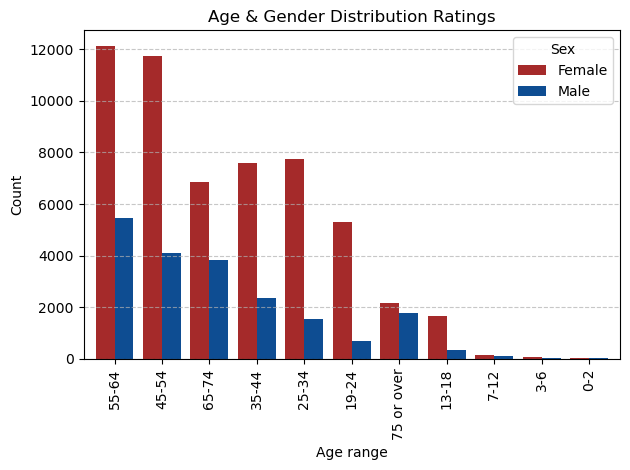

In [1099]:
# Plot age and gender distribution for all Ease of Use ratings
plt.figure(figsize=[8, 6])

most = data[['EaseofUse', 'Age', 'Sex']]
sex_age_counts = most.groupby(['EaseofUse', 'Age', 'Sex']).size().unstack(fill_value=0)
sex_age_counts = sex_age_counts.groupby('Age').sum()

# Order age groups from most to least count
sex_age_counts = sex_age_counts.reindex(sex_age_counts.sum(axis=1).sort_values(ascending=False).index)

# Plotting
colors = {'Male': '#0E4D92', 'Female': 'brown'}
sex_age_counts.plot(kind='bar', width=0.8, color=[colors[col] for col in sex_age_counts.columns])
plt.title('Age & Gender Distribution Ratings')
plt.xlabel('Age range')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines

plt.tight_layout()
# plt.savefig('age_gender_distribution_all_scores.png', dpi=300, bbox_inches='tight')
plt.show()


##### Text cleaning 

/var/folders/l7/34l_1dvx25g3dr7nbqs1k0lm0000gn/T/ipykernel_28620/1513610095.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = review[review['ReviewLength'] <= 20].count()[0]
/var/folders/l7/34l_1dvx25g3dr7nbqs1k0lm0000gn/T/ipykernel_28620/1513610095.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = review[(review['ReviewLength'] > 20) & (review['ReviewLength'] <= 100)].count()[0]
/var/folders/l7/34l_1dvx25g3dr7nbqs1k0lm0000gn/T/ipykernel_28620/1513610095.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

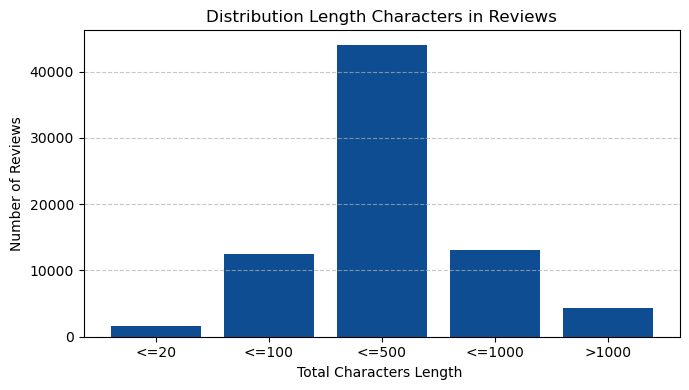

In [736]:
# # Plot review length Just for making the plot
# review = data
# review['ReviewLength'] = review['Reviews'].apply(lambda x: len(str(x)))
# a = review[review['ReviewLength'] <= 20].count()[0]
# b = review[(review['ReviewLength'] > 20) & (review['ReviewLength'] <= 100)].count()[0]
# c = review[(review['ReviewLength'] > 100) & (review['ReviewLength'] <= 500)].count()[0]
# d = review[(review['ReviewLength'] > 500) & (review['ReviewLength'] <= 1000)].count()[0]
# e = review[review['ReviewLength'] > 1000].count()[0]

# categories = ['<=20', '<=100', '<=500', '<=1000', '>1000']
# counts = [a, b, c, d, e]

# plt.figure(figsize=(7, 4))
# plt.bar(categories, counts, color='#0E4D92')
# plt.xlabel('Total Characters Length ')
# plt.ylabel('Number of Reviews')
# plt.title('Distribution Length Characters in Reviews')
# plt.tight_layout()
# plt.grid(axis='y', linestyle='--', alpha=0.7) 
# # plt.savefig('review_length.png')  # Save the figure as PNG
# plt.show()

In [1100]:
# See data 
data.EaseofUse.value_counts()

EaseofUse
3    54670
1    12888
2     8250
Name: count, dtype: int64

In [1101]:
# Set contradiction to their natural form: cant --> can not
def remove_cont(text):
    return contractions.fix(text)

data['Reviews'] = data['Reviews'].apply(remove_cont)

In [1102]:
# Tokenize review in order to preprocess
data['Tokenized_Reviews'] = data['Reviews'].apply(word_tokenize)

In [1103]:
# Lowercase review feature
data['Tokenized_Reviews'] = data['Tokenized_Reviews'].apply(lambda x: [word.lower() for word in x])

In [1104]:
# Remove accents from review feature
data['Tokenized_Reviews'] = data['Tokenized_Reviews'].apply(lambda tokens: [unidecode(token) for token in tokens])

In [1105]:
# Remove punctuation and other characters from review feature
data['Tokenized_Reviews'] = data['Tokenized_Reviews'].apply(lambda tokens: [re.sub(r'[^a-zA-Z0-9\s]', '', token) for token in tokens])

In [1106]:
# Remove stopwords from review feature
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
data['Tokenized_Reviews'] = data['Tokenized_Reviews'].apply(remove_stopwords)

In [1107]:
# Apply lemmatization to review feature
lemma = WordNetLemmatizer()
def lemma_review(tokens):
    lemmatized_tokens = [lemma.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply lemmatization to tokenized reviews
data['Tokenized_Reviews'] = data['Tokenized_Reviews'].apply(lemma_review)

In [1108]:
# Remove numbers that are bigger than 4 digits, a medicine dosis is never bigger then 4000 mg for example
def remove_nr(tokens):
    digit = r'\b\d{4,}\b'
    filt_tokens = [re.sub(digit, '', token) for token in tokens]
    return filt_tokens
data['Tokenized_Reviews'] = data['Tokenized_Reviews'].apply(remove_nr)

In [1109]:
# Join the clean tokens back to string and reviews drop the tokenized review
data['Reviews'] = data['Tokenized_Reviews'].apply(lambda tokens: ' '.join(tokens))
data.drop(columns=['Tokenized_Reviews'], inplace=True)

In [1110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75808 entries, 0 to 362281
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        75808 non-null  object
 1   Reviews    75808 non-null  object
 2   Sex        75808 non-null  object
 3   EaseofUse  75808 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [1111]:
# Filter out reviews with a length less than or equal to 1
data = data[data['Reviews'].apply(lambda x: len(x) >= 1)]

In [1112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75790 entries, 0 to 362281
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        75790 non-null  object
 1   Reviews    75790 non-null  object
 2   Sex        75790 non-null  object
 3   EaseofUse  75790 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


Wordcloud for class: 1


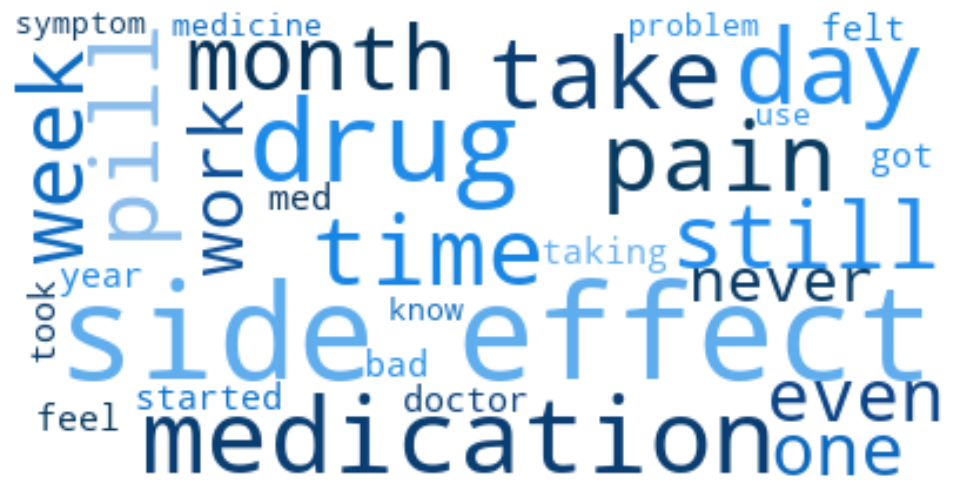

Wordcloud for class: 2


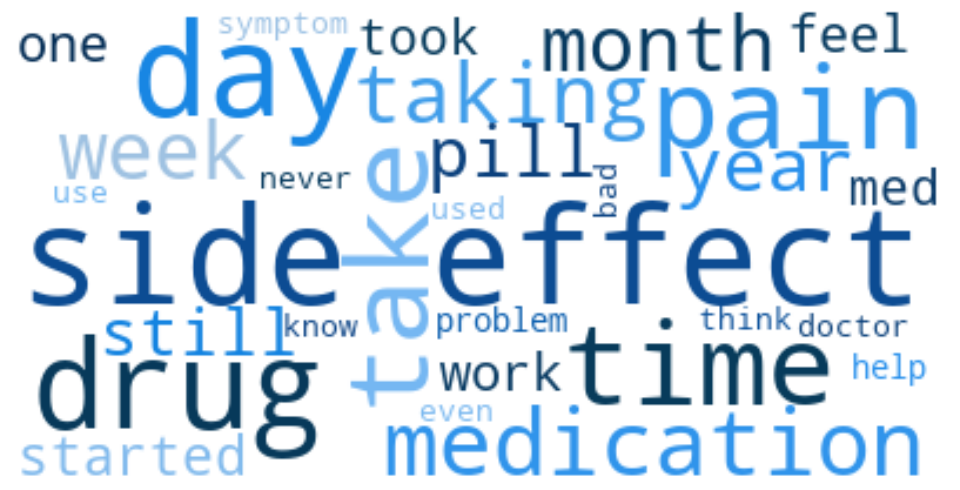

Wordcloud for class: 3


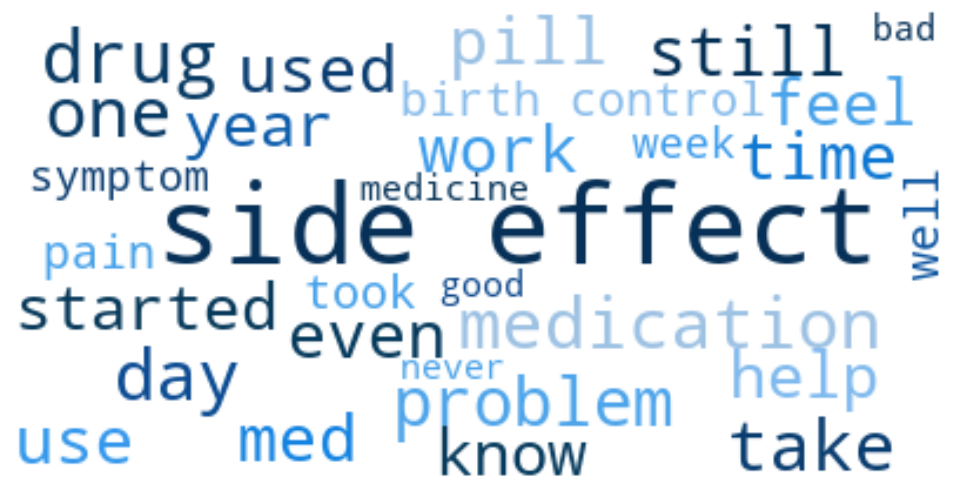

In [1064]:
# Print word cloud per usability satisfaction
colors = [ '#9fc2e2', '#77b8f2', '#4aa3e9', '#268fec', '#0f80de', '#0c468a', '#0a3b6b', '#073b5b', '#052c55']
cmap = LinearSegmentedColormap.from_list('custom_blue', colors)
usability = [1, 2, 3]
for i in usability:
    print("Wordcloud for class:", i)
    mask_df = data[data["EaseofUse"] == i]["Reviews"].values
    text = " ".join(mask_df)
    wordcloud = WordCloud(max_words=30, background_color='white', colormap=cmap).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout()
    # plt.savefig(f'wordcloud_{i}.png', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()
    print("="*100)

In [1113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75790 entries, 0 to 362281
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        75790 non-null  object
 1   Reviews    75790 non-null  object
 2   Sex        75790 non-null  object
 3   EaseofUse  75790 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [1114]:
# data.to_csv('/content/drive/MyDrive/3_classes/clean_data.csv')
data.to_csv('clean_data.csv')